<a href="https://colab.research.google.com/github/joyce-ol/movie_sentiment_analysis/blob/main/movie_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:


file_path = '/content/drive/My Drive/dataset/movie_data.csv'
df= pd.read_csv(file_path)


In [ ]:
df.head(20)

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0
5,This movie is probably one of 3 worst movies m...,0
6,"this movie is quite bad, aggressive, not playe...",0
7,And a perfect film to watch during the holiday...,1
8,"I like Noel Coward, the wit. I like Noel Cowar...",0
9,"""The Days"" is a typical family drama with a li...",1


In [ ]:
df.tail()


,review,sentiment
49964,This movie is terrible. It's about some no bra...,0
49965,"Well, what was fun... except for the fun part....",0
49966,By the time this film was released I had seen ...,0
49967,"Well, if you like pop/punk, punk, ska, and a t...",0
49968,Where this movie is faithful to Burroughs' vis...,1


In [ ]:
df.shape

(49969, 2)

In [ ]:
df.dtypes

,0
review,object
sentiment,int64


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
0,24987
1,24982


In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0


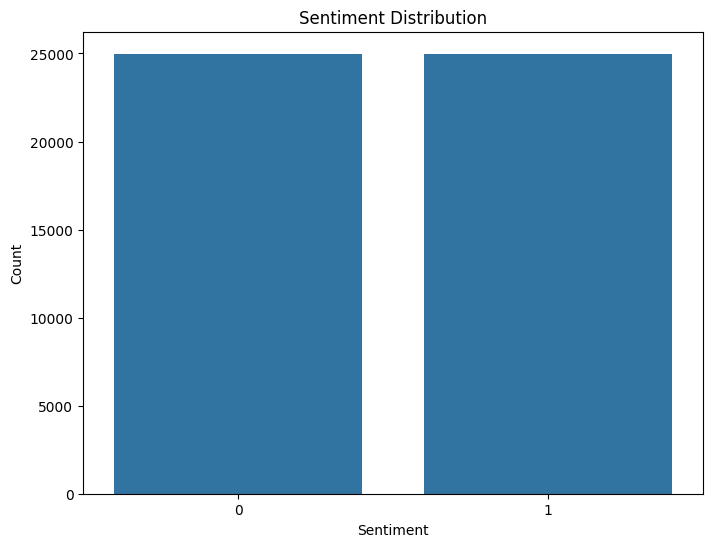

In [ ]:
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()



In [ ]:
# import libraries for cleaning process
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

In [ ]:
# defining function for cleaning text
def clean_text(text):
  text = BeautifulSoup(text, "html.parser").get_text() # remove html tags
  text = text.lower()  # conver to lower case
  text = re.sub(r"http\S+|www\S+", " URL ", text) #remove url
  text = re.sub(r"[^a-z\s]", " ", text)
  tokens = text.split()  # Tokenize
  tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stopwords and lemmatize
  return " ".join(tokens)    # Join back into single string


In [ ]:
df["clean_review"] = df["review"].astype(str).apply(clean_text)

In [ ]:
df.head()

,review,sentiment,clean_review
0,This movie is just crap. Even though the direc...,0,movie crap even though director claim part oi ...
1,Another detailed work on the subject by Dr Dwi...,1,another detailed work subject dr dwivedi take ...
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0,cat nine tail il gatto nove code aspect ratio ...
3,"Like with any movie genre, there are good gang...",0,like movie genre good gangster movie bad gangs...
4,I watched it with my mom and we were like...<b...,0,watched mom like hell get may wrong chair some...


In [ ]:
# Example review
text = "This movie is just crap. Even though the director..."
print(clean_text(text))

movie crap even though director


In [ ]:
# visualing the review of movie using word cloud

from wordcloud import WordCloud

# combining all clean review in one string
text = " ".join(str(review) for review in df["clean_review"])

# generate world cloud
wordcloud = WordCloud(width=800, height=500, background_color="white").generate(text)


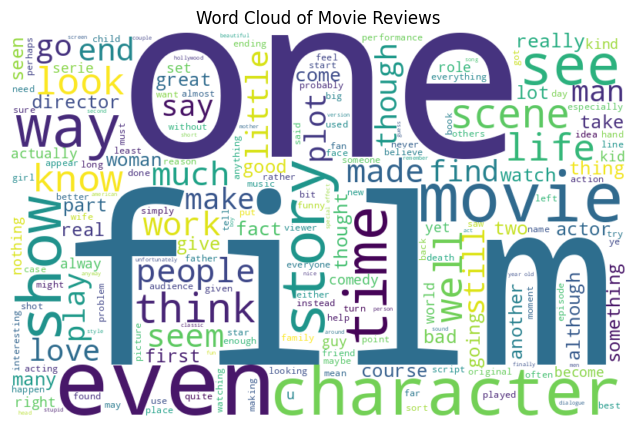

In [ ]:
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Movie Reviews")
plt.show()

In [ ]:
# feature selction and split data
from sklearn.model_selection import train_test_split

x = df['clean_review']
y = df['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 42)

In [ ]:
# vetorize the text data
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)
x_train_bow = vectorizer.fit_transform(x_train)
x_test_bow = vectorizer.transform(x_test)


print("Shape of BoW train data:", x_train_bow.shape)
print("Example features:", vectorizer.get_feature_names_out()[:20])

Shape of BoW train data: (39975, 5000)
Example features: ['aaron' 'abandoned' 'abc' 'ability' 'able' 'abrupt' 'absence' 'absent'
 'absolute' 'absolutely' 'absurd' 'absurdity' 'abuse' 'abused' 'abusive'
 'abysmal' 'academy' 'accent' 'accept' 'acceptable']


In [ ]:
# train the model using logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(x_train_bow, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# make prediction and check the accuracy of the model
y_pred = lr_model.predict(x_test_bow)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8750250150090054

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      5020
           1       0.87      0.88      0.88      4974

    accuracy                           0.88      9994
   macro avg       0.88      0.88      0.88      9994
weighted avg       0.88      0.88      0.88      9994


Confusion Matrix:
 [[4357  663]
 [ 586 4388]]


The model is well balanced (no class bias).

It achieves 87–88% precision, recall, and F1-score, which is excellent for sentiment analysis.

Train using Randomforest

In [ ]:
# tain randomforst classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_bow, y_train)

In [41]:
# make prediction
y_pred_rf = rf_model.predict(x_test_bow)

print(" Random Forest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_rf))



 Random Forest Performance
Accuracy: 0.8479087452471483

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      5020
           1       0.84      0.85      0.85      4974

    accuracy                           0.85      9994
   macro avg       0.85      0.85      0.85      9994
weighted avg       0.85      0.85      0.85      9994


Confusion matrix:
 [[4239  781]
 [ 739 4235]]


0.8479 (~85%) → the model correctly predicts sentiment about 85% of the time.

Lower than Logistic Regression (which had ~88%).

train the model using Navie bayes

In [ ]:
# tarining using Naive bayes
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(x_train_bow, y_train)


In [42]:
# making prediction
y_pred_nb = nb_model.predict(x_test_bow)

print(" Naive Bayes Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_nb))

 Naive Bayes Performance
Accuracy: 0.8482089253552131

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      5020
           1       0.84      0.85      0.85      4974

    accuracy                           0.85      9994
   macro avg       0.85      0.85      0.85      9994
weighted avg       0.85      0.85      0.85      9994


Confusion matrix:
 [[4233  787]
 [ 730 4244]]


Accuracy:  84.8%  slightly lower than Logistic Regression (~87.5%), about the same as Random Forest ( 84.8%).

In [ ]:
# Correct predictions
y_pred = lr_model.predict(x_test_bow)       # Logistic Regression
y_pred_rf = rf_model.predict(x_test_bow)   # Random Forest
y_pred_nb = nb_model.predict(x_test_bow)   # Naive Bayes


Model Accuracies:
Logistic Regression: 0.8750
Random Forest: 0.8479
Naive Bayes: 0.8482


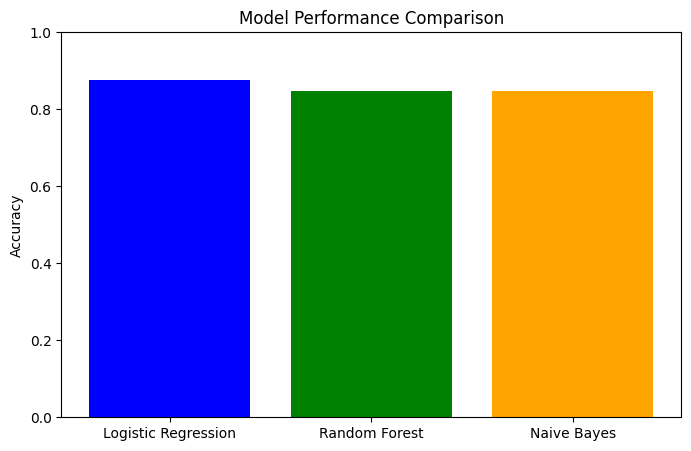

In [40]:
import matplotlib.pyplot as plt

# Dictionary to hold results
model_performance = {
    "Logistic Regression": accuracy_score(y_test, y_pred),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb)
}

# Print performance
print("Model Accuracies:")
for model, acc in model_performance.items():
    print(f"{model}: {acc:.4f}")

# Plot
plt.figure(figsize=(8,5))
plt.bar(model_performance.keys(), model_performance.values(), color=['blue','green','orange'])
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


Logistic Regression performs best, likely because text data (sparse, high-dimensional) favors linear models.

Random Forest and Naïve Bayes perform decently but slightly worse.

All three models are well-balanced (precision ≈ recall, no strong bias).

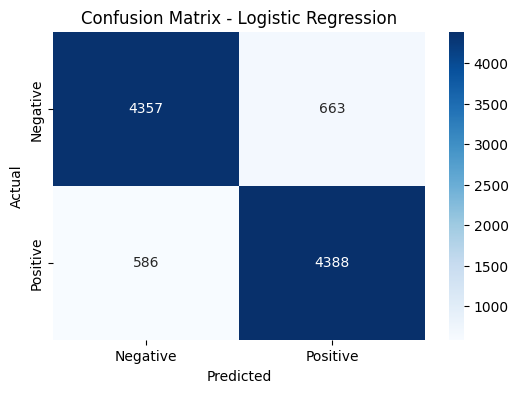

In [39]:
# Example: using Logistic Regression predictions
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

4357 → The model correctly said these reviews were Negative.

663 → The model mistakenly said Positive, but they were really Negative.

586 → The model mistakenly said Negative, but they were really Positive.

4388 → The model correctly said these reviews were Positive.

What this tells us

Most predictions are correct → both classes have strong results.

The model makes slightly more mistakes with Negative reviews (663 FPs) than with Positive ones (586 FNs).

Accuracy comes out around 87%.

The model is balanced (precision and recall for Positive and Negative are both ~87–88%).

In [ ]:
# make prediction on new data on each model using function
# logistic regrsion
def predict_sentiment_lr(text):
  text_bow = vectorizer.transform([text])
  prediction = lr_model.predict(text_bow)[0]
  return prediction


# random forest
def predict_sentiment_rf(text):
  text_bow = vectorizer.transform([text])
  prediction = rf_model.predict(text_bow)[0]
  return prediction

#navie bayes
def predict_sentiment_nb(text):
  text_bow = vectorizer.transform([text])
  prediction = nb_model.predict(text_bow)[0]
  return prediction



In [43]:
def predict_all_models(text):
    print(f"Review: '{text}'")
    print(f"Logistic Regression: {predict_sentiment_lr(text)}")
    print(f"Random Forest: {predict_sentiment_rf(text)}")
    print(f"Naive Bayes: {predict_sentiment_nb(text)}")
    print("-" * 50)

# Example usage
input_text = 'Could have been better'
predict_all_models(input_text)

Review: 'Could have been better'
Logistic Regression: 0
Random Forest: 1
Naive Bayes: 0
--------------------------------------------------


Logistic Regression & Naive Bayes handle subtle wording better in this case.

Random Forest struggles with implied or contextual negativity.

    CONCLUSION SUMMARY

After evaluating three models — Logistic Regression, Random Forest, and Naive Bayes — on the sentiment classification task, Logistic Regression emerged as the most reliable model. It consistently handled both clear and nuanced reviews, achieving the highest overall accuracy.

 Naive Bayes performed competitively, offering a simple yet effective alternative, while Random Forest showed weaker performance, particularly on short or ambiguous reviews where it tended to misinterpret context.

 Therefore, Logistic Regression is recommended as the primary model for sentiment prediction, with Naive Bayes serving as a lightweight backup option.

